# Typical Plot

## Required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from stokes import *

## Input variables

In [2]:
# Load
load = [0, 0, 1]

# Receiver
R = 1
f_deg_var = np.arange(0.1, 90, 0.1)  # Note the variation
f_rad_var = f_deg_var * np.pi / 180
coord_sph_var = [[R, f, 0] for f in f_rad_var]
coord_cart_far = [[R*np.sin(f), 0, R*np.cos(f)] for f in f_rad_var]

# Soil
Vsel = 1
dens = 1
nu = 0.30
ksi = 0.02
Gel = Vsel**2 * dens
Gvisc = Gel * (1 + 2 * 1j * ksi)
Vs = Vsel * np.sqrt(Gvisc/Gel)

# Frequency
omega_var = np.array([0, 1, 2, 5, 10, 20])  # Note the variation
omega_s_var = [omega*R/Vs for omega in omega_var]

## Computations

In [3]:
# Empty lists to store results
u_results = []
e_results = []
s_results = []

# Double loop to calculate results
for i,omega_s in enumerate(omega_s_var):

    # Empty lists to store results
    u_omega = []
    e_omega = []
    s_omega = []

    for i,coord_sph in enumerate(coord_sph_var):
        # Compute
        [G,dGdx] = stokes_spherical(coordinates=coord_sph, shear=Gvisc, poisson=nu, omega_s=omega_s)
        [u,dudx] = displacement(dP=load, G=G, dGdx=dGdx)
        e = strain_spherical(dudx=dudx, u=u, coordinates=coord_sph)
        s = stress(strain=e, shear=Gvisc, poisson=nu)
        # Append
        u_omega.append(u)
        e_omega.append(e)
        s_omega.append(s)

    # Append
    u_results.append(u_omega)
    e_results.append(e_omega)
    s_results.append(s_omega)

## Polar plot

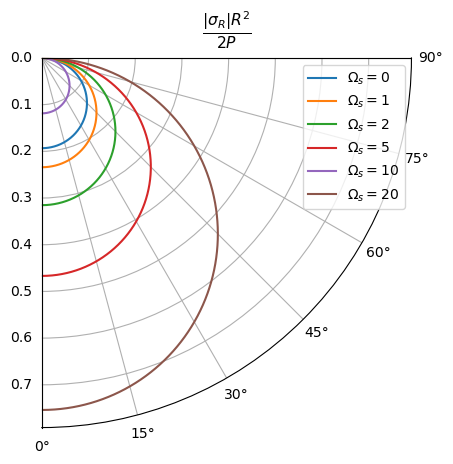

In [4]:
# Select result
sigma_r = [[np.abs(s[i][0]) for i in range(len(f_deg_var))] for s in s_results]

# Plot
fig,ax = plt.subplots(subplot_kw={"projection":"polar"})
for i, omega in enumerate(omega_var):
    ax.plot(f_rad_var, np.abs(sigma_r[i]), label=rf'$\Omega_{{s}} = {omega}$')
ax.set_title(r"$\frac{{|\sigma_R| R^2}}{{2 P}}$", fontsize = 16)
ax.set_thetamax(90)
ax.set_theta_zero_location("S")
ax.legend()
plt.show()